## Carbon Emissions Data Cleansing and Exploration

Exec Summary Will go here:

In [142]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import math
%matplotlib inline

In [124]:
df = pd.read_csv('predicting_carbon_emissions_cleaned.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [125]:
# df = df[df.angerindex != 0]

In [126]:
df = df.rename(columns = {'Carbon_Emission__tCO2e/mmUSD':'Carbon'})

In [127]:
df.head(3)

,Unnamed:_0,Company_Name,Listed,HQ_Country,GICS_Sector,Accounting_Year_End,Reported_Scope_1_tCO2e,Estimated_Scope_1_tCO2e,Scope_1_source,Scope_1_quality_flag,Reported_market-based_Scope_2_tCO2e,Note,Reported_location-based_Scope_2_tCO2e,Estimated_location-based_Scope_2_tCO2e,Location-based_Scope_2_source,Location-based_Scope_2_quality_flag,Scope_2_company_comments,GHG_revenue_intensity_tCO2e/mmUSD,Scope_2_figure_used_for_intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN_lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon,Scope_1_tCO2e,Scope_2_tCO2e,Scope_1_and_2_tCO2e,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities
0,1,Sociedad Comercial del Plata SA,Yes,Argentina,Energy,31/12/2016,0.00,1400.0,Estimated: Gamma GLM,2.0,NaN,NA,0.0,3000.0,Estimated: IEA National Grid Emissions Factor ...,3.0,NaN,26.03,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.021700,0.178446,26.030882,1400.00,3000.0,4400.00,0,0,1,0,0,0,0,0,0,0,0
1,2,Banco de Galicia y Buenos Aires S.A.,Yes,Argentina,Financials,31/12/2016,933.37,0.0,Reported: CDP (Not Reviewed),NaN,NaN,NA,27626.0,0.0,Reported: CDP (Not Reviewed),NaN,NaN,7.97,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841,933.37,27626.0,28559.37,0,0,0,1,0,0,0,0,0,0,0
2,3,YPF SA,Yes,Argentina,Energy,31/12/2016,0.00,12000000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,NA,0.0,1200000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,926.11,Location-based,48,84,165,110,102,123,221,87,69,86,102,72,89,62,75,98,73,98,94,55,89,170,0,98,111,14,0,87,26,130,90,0.23,0.12,0.23,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720,12000000.00,1200000.0,13200000.00,0,0,1,0,0,0,0,0,0,0,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 77 columns):
Unnamed:_0                                3940 non-null int64
Company_Name                              3940 non-null object
Listed                                    3940 non-null object
HQ_Country                                3940 non-null object
GICS_Sector                               3940 non-null object
Accounting_Year_End                       3940 non-null object
Reported_Scope_1_tCO2e                    3940 non-null float64
Estimated_Scope_1_tCO2e                   3940 non-null float64
Scope_1_source                            3940 non-null object
Scope_1_quality_flag                      2810 non-null float64
Reported_market-based_Scope_2_tCO2e       1003 non-null object
Note                                      3940 non-null object
Reported_location-based_Scope_2_tCO2e     3940 non-null float64
Estimated_location-based_Scope_2_tCO2e    3940 non-null float64
Locatio

In [129]:
x1 = df['Scope_1_tCO2e']
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     1905.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:26:35   Log-Likelihood:                -35025.
No. Observations:                3940   AIC:                         7.005e+04
Df Residuals:                    3938   BIC:                         7.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           310.5415     28.463     10.910      0.000     254.739     366.344
Scope_1_tCO2e  8.101e-05   1.86e-06     43.643      0.000    7.74e-05    8.47e-05
==============================================================================
Omnibus:                     6527.400   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8184144.777
Skew:                          10.780   Prob(JB):                         0.00
Kurtosis:                     225.234   Cond. No.                     1.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
X_step = df
X_step_clean = df[['HE_negativeindex',
       'angerindex', 'anticipationindex', 'disgustindex', 'fearindex',
       'joyindex', 'sadnessindex', 'surpriseindex', 'trustindex',
       'LMnegativeindex', 'LMpositiveindex', 'LMuncertaintyindex',
       'BasicNegativeWordsindex', 'PositivePolarisedindex',
       'NegativePolarisedindex', 'PowerWordsindex', 'PrudentialNegativeindex',
       'PrudentialPositiveindex', 'HE_positiveindex']]
y_step = list(df['Carbon'])
def stepwise_selection(X_step_clean, y_step,
                       initial_list=[],
                       threshold_in=0.0001,
                       threshold_out = 0.005,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = stepwise_selection(X_step_clean, X_step['Carbon'], verbose=True)
print('resulting features:')
print(result)

resulting features:
[]


In [131]:
formula = 'Carbon ~ C(GICS_Sector) + Scope_1_tCO2e'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

                    df        sum_sq       mean_sq            F         PR(>F)
C(GICS_Sector)    10.0  2.912717e+09  2.912717e+08   101.087156  5.130964e-187
Scope_1_tCO2e      1.0  3.786199e+09  3.786199e+09  1314.017387  1.831306e-248
Residual        3928.0  1.131811e+10  2.881392e+06          NaN            NaN


In [132]:
df = df.drop(columns =['Unnamed:_0'])

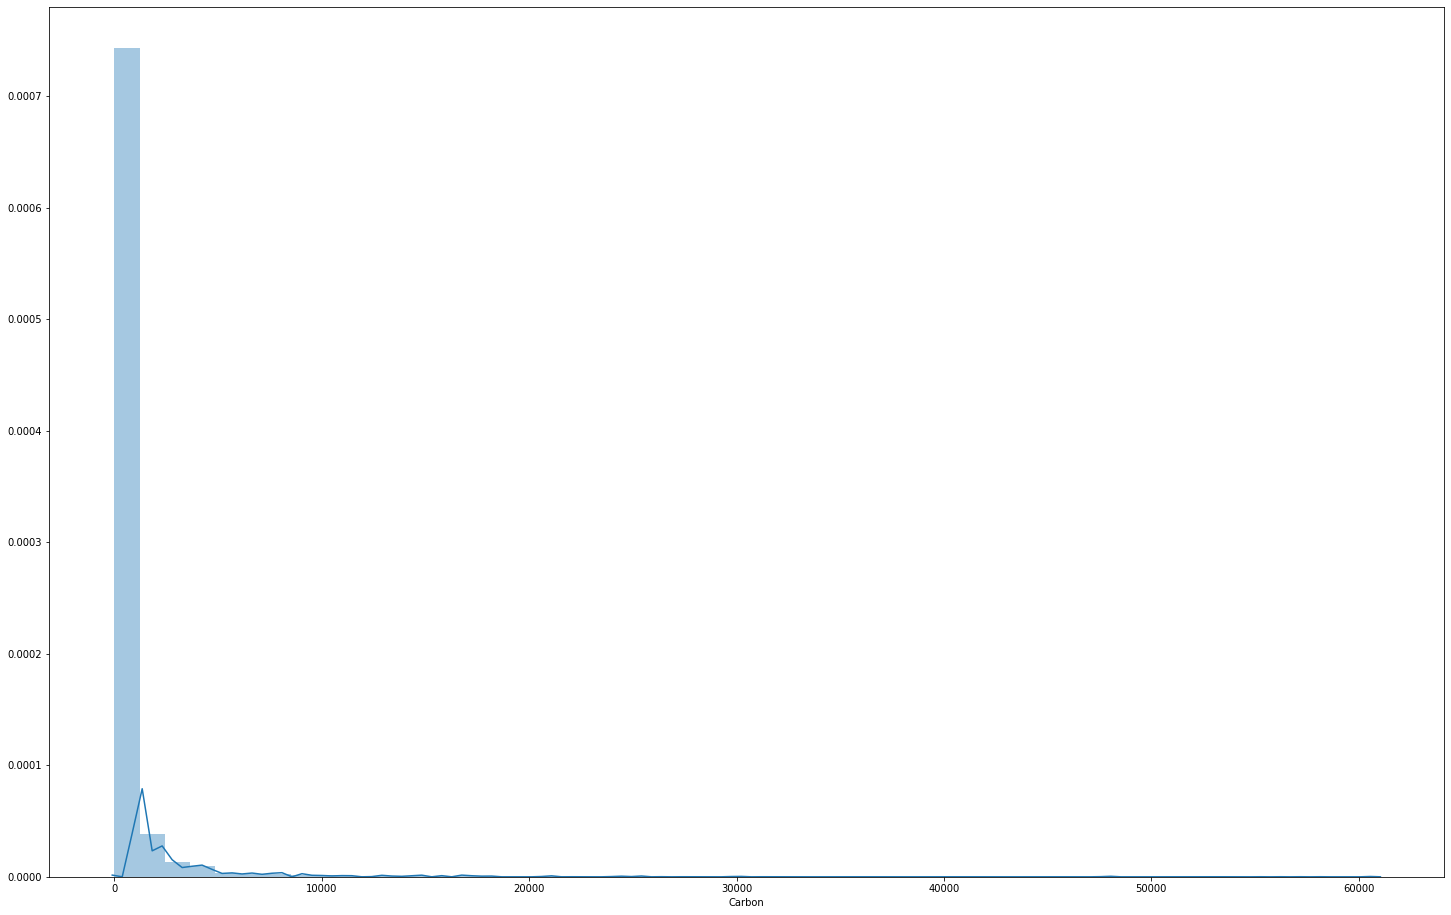

In [133]:
plt.figure(figsize=(25,16))
sns.distplot(df['Carbon'])

In [134]:
sectors = df['GICS_Sector'].unique()
# for sector in sectors: 
#     sector_df = df[df['GICS_Sector'] == sector]
#     plt.figure(figsize=(16,12))
#     plt.title(sector)
#     sns.distplot(sector_df.Carbon)
#     plt.show()

In [143]:
x1 = df[['HE_positiveindex', 'Energy', 'Consumer_Discretionary', 'Industrials', 'Materials',
       'Consumer_Staples', 'Financials', 'Utilities','Telecommunication_Services', 'Information_Technology', 
        'Health_Care']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

/Users/nielsclausen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     69.51
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          7.25e-143
Time:                        16:45:40   Log-Likelihood:                -35451.
No. Observations:                3940   AIC:                         7.093e+04
Df Residuals:                    3928   BIC:                         7.100e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        176.6136    142.300      1.241      0.215    -102.375     455.602
HE_positiveindex              -1.4864      0.609     -2.443      0.015      -2.680      -0.293
Energy                      1238.1373    186.057      6.655      0.000     873.360    1602.915
Consumer_Discretionary        29.4849    162.763      0.181      0.856    -289.623     348.593
Industrials                  144.4615    159.936      0.903      0.366    -169.104     458.027
Materials                   1052.4587    168.044      6.263      0.000     722.997    1381.920
Consumer_Staples               4.2302    176.121      0.024      0.981    -341.066     349.527
Financials                   -95.7393    168.152     -0.569      0.569    -425.413     233.934
Utilities                   3541.5770    195.881     18.080      0.000    3157.539    3925.614
Telecommunication_Services   -53.4004    237.990     -0.224      0.822    -519.996     413.196
Information_Technology       -39.0463    172.292     -0.227      0.821    -376.837     298.744
Health_Care                   79.0236    196.377      0.402      0.687    -305.988     464.035
==============================================================================
Omnibus:                     7404.280   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16313926.890
Skew:                          14.024   Prob(JB):                         0.00
Kurtosis:                     316.986   Cond. No.                         950.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
x1 = df[['HE_positiveindex', 'Energy', 'Industrials', 'Materials', 'Utilities']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     152.7
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          1.19e-148
Time:                        16:26:36   Log-Likelihood:                -35452.
No. Observations:                3940   AIC:                         7.092e+04
Df Residuals:                    3934   BIC:                         7.095e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              164.2976     46.097      3.564      0.000      73.922     254.674
HE_positiveindex    -1.5131      0.606     -2.495      0.013      -2.702      -0.324
Energy            1251.3496    127.446      9.819      0.000    1001.484    1501.215
Industrials        157.6094     85.039      1.853      0.064      -9.116     324.334
Materials         1065.5363     99.531     10.706      0.000     870.398    1260.674
Utilities         3554.6402    141.527     25.116      0.000    3277.167    3832.113
==============================================================================
Omnibus:                     7406.238   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16333643.717
Skew:                          14.032   Prob(JB):                         0.00
Kurtosis:                     317.176   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
hypotheses = '(Energy = Industrials = Materials = Utilities)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[162.33329028]]), p=3.389970901184632e-99, df_denom=3.93e+03, df_num=3>


In [139]:
formula = 'Carbon ~ Energy + Consumer_Discretionary + Industrials + Materials + Consumer_Staples + Financials + Utilities + Telecommunication_Services + Information_Technology + Health_Care'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                  sum_sq      df           F        PR(>F)
Energy                      1.670483e+08     1.0   43.453350  4.918575e-11
Consumer_Discretionary      7.106038e+04     1.0    0.018485  8.918615e-01
Industrials                 2.809740e+06     1.0    0.730882  3.926496e-01
Materials                   1.495464e+08     1.0   38.900683  4.930845e-10
Consumer_Staples            5.523421e+03     1.0    0.001437  9.697655e-01
Financials                  1.932061e+06     1.0    0.502576  4.784124e-01
Utilities                   1.253069e+09     1.0  325.953912  4.617549e-70
Telecommunication_Services  3.785011e+05     1.0    0.098457  7.537054e-01
Information_Technology      3.861799e+05     1.0    0.100455  7.513013e-01
Health_Care                 2.872936e+05     1.0    0.074732  7.845819e-01
Residual                    1.510431e+10  3929.0         NaN           NaN


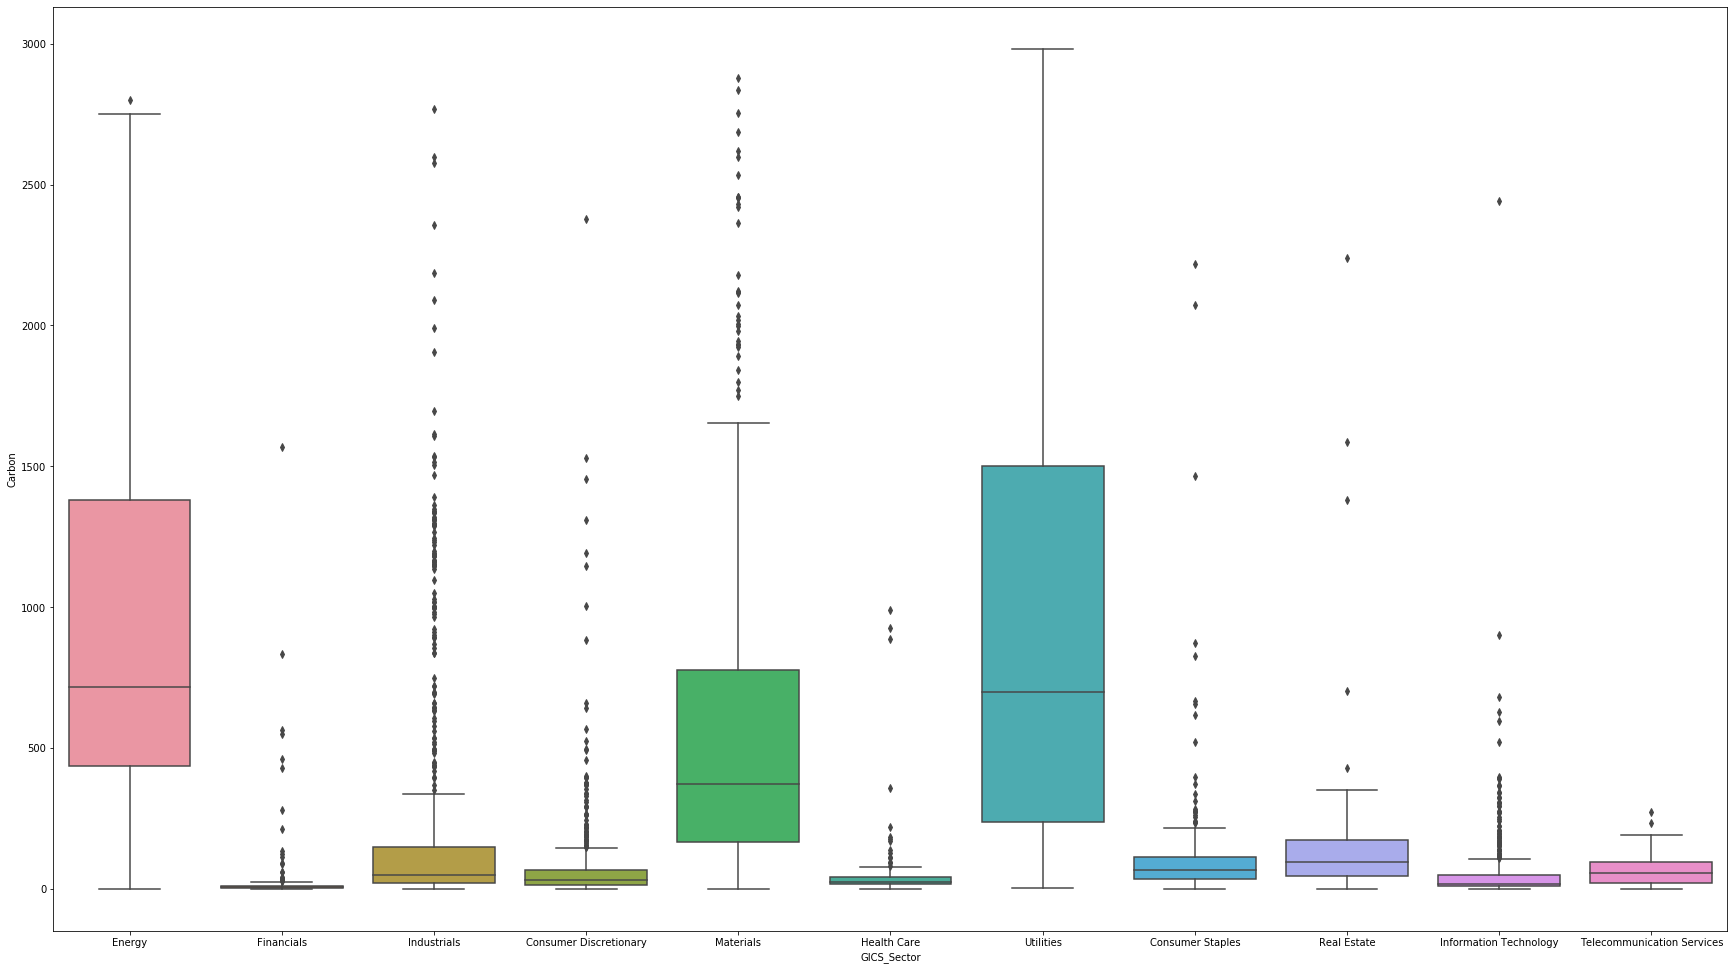

In [155]:
plt.figure(figsize=(30,17))
sns.boxplot(x = df["GICS_Sector"], y = df["Carbon"])

In [154]:
df.drop(df[df['Carbon']>3000].index, inplace = True)